Sprint 2

Team ID - PNT2022TMID28890

Importing the required libraries

In [2]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data ()
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')
number_of_classes = 10  #storing the no of classes in a variable
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

11490434/11490434 [==============================] - 0s 0us/step


Add CNN Layers

In [4]:
#create model
model=Sequential ()

In [5]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [6]:
#flatten the dimension of the image
model.add(Flatten())

In [7]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

Compiling the model

In [8]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [9]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

Train the model

In [10]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 194s 103ms/step - loss: 0.2223 - accuracy: 0.9523 - val_loss: 0.1478 - val_accuracy: 0.9561
Epoch 2/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0724 - accuracy: 0.9780 - val_loss: 0.0982 - val_accuracy: 0.9753
Epoch 3/5
1875/1875 [==============================] - 193s 103ms/step - loss: 0.0510 - accuracy: 0.9845 - val_loss: 0.0895 - val_accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0368 - accuracy: 0.9887 - val_loss: 0.0933 - val_accuracy: 0.9769
Epoch 5/5
1875/1875 [==============================] - 192s 102ms/step - loss: 0.0314 - accuracy: 0.9899 - val_loss: 0.0913 - val_accuracy: 0.9803


Observing the metrics

In [11]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.09131836891174316, 0.9803000092506409]


In [12]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 83ms/step
[[1.4441044e-14 9.1065834e-19 1.0254648e-16 4.4252186e-08 7.1113054e-10
  6.5155485e-11 1.0583828e-18 2.6764674e-10 5.8668043e-11 1.0000000e+00]]


In [13]:
x_test=x_test.reshape (10000, 28, 28).astype ('float32')

In [14]:
x_test[6000]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

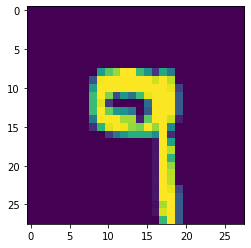

In [15]:
plt.imshow(x_test[6000])

In [16]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [17]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

Save The model

In [18]:
# Save the model
model.save('models/mnistCNN.h5')